In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline




 # Read Data

In [2]:
data=pd.read_csv("/kaggle/input/the-boston-houseprice-data/boston.csv")

In [3]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
data.rename(columns = {'MEDV':'PRICE'},inplace = True)

In [5]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
corr=data.corr()

In [9]:
corr.shape

(14, 14)

In [10]:
corr.style.background_gradient(cmap = 'brg_r') 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# Correlation Matrix

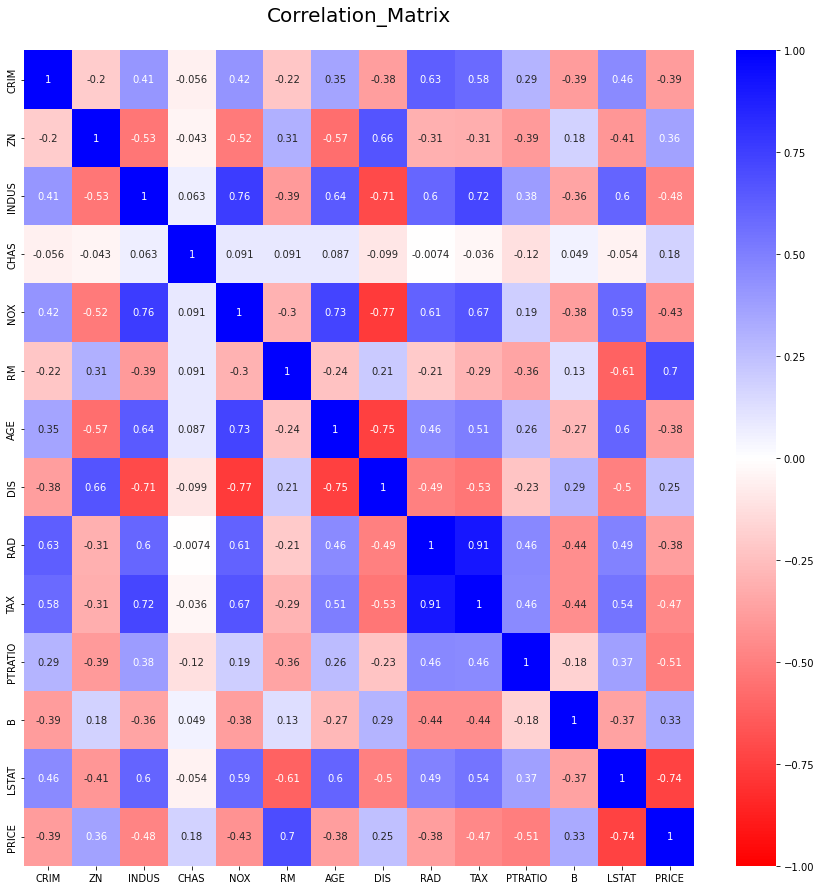

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='bwr_r')
plt.title("Correlation_Matrix\n",color="black",fontsize=20)
plt.show()


#  Check Null value

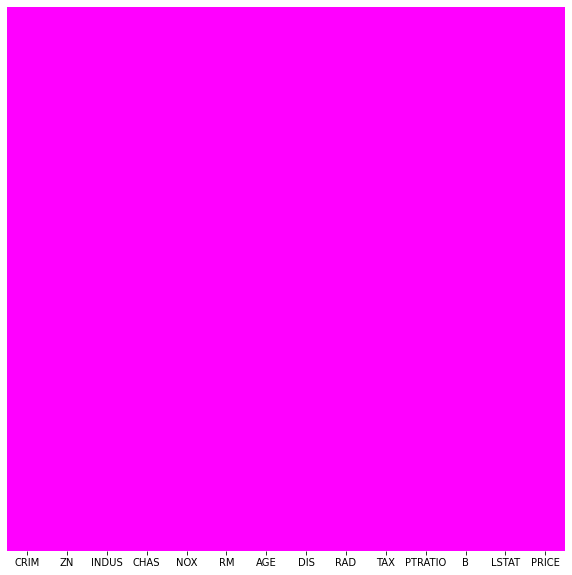

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="cool_r")
plt.show()

#  Room Vs Price Scatterplot

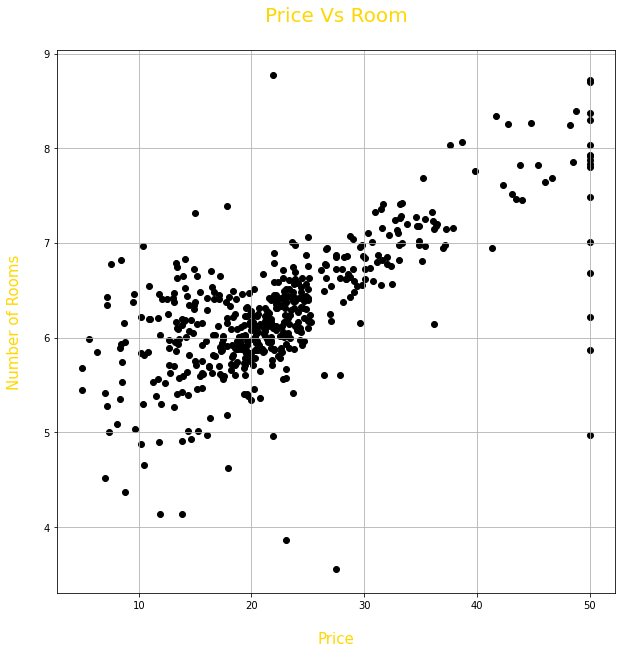

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(data['PRICE'],data['RM'],color="black")
plt.title("Price Vs Room\n",color="gold",fontsize=20)
plt.xlabel('\nPrice',fontsize=15,color="gold")
plt.ylabel('Number of Rooms\n',fontsize=15,color="gold")
plt.grid(True)

plt.show()

# price vs Tax Scatter Plot

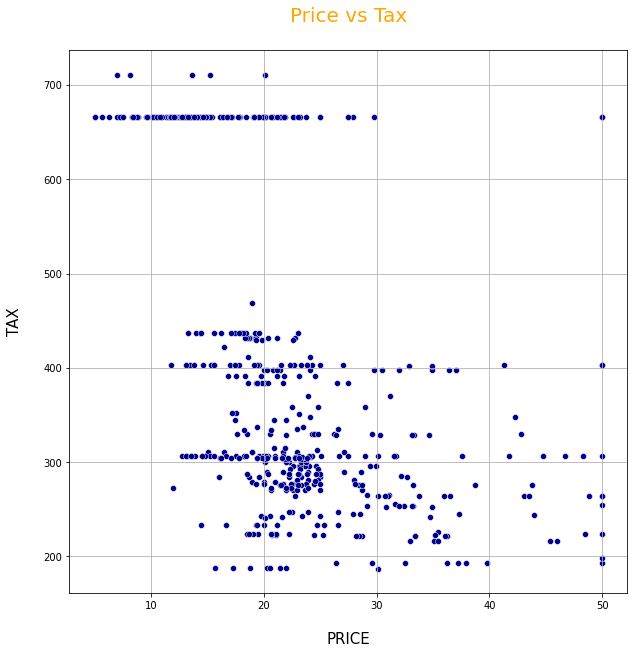

In [14]:
                    
plt.figure(figsize=(10,10))
sns.scatterplot(x="PRICE",y="TAX",data=data,color="darkblue")
plt.xlabel("\nPRICE",fontsize=15,color="black")
plt.ylabel("TAX\n ",fontsize=15,color="black")
plt.title("Price vs Tax\n",fontsize=20,color="orange")
plt.grid(True)
plt.show()

# Age  Vs Tax Scatter Plot

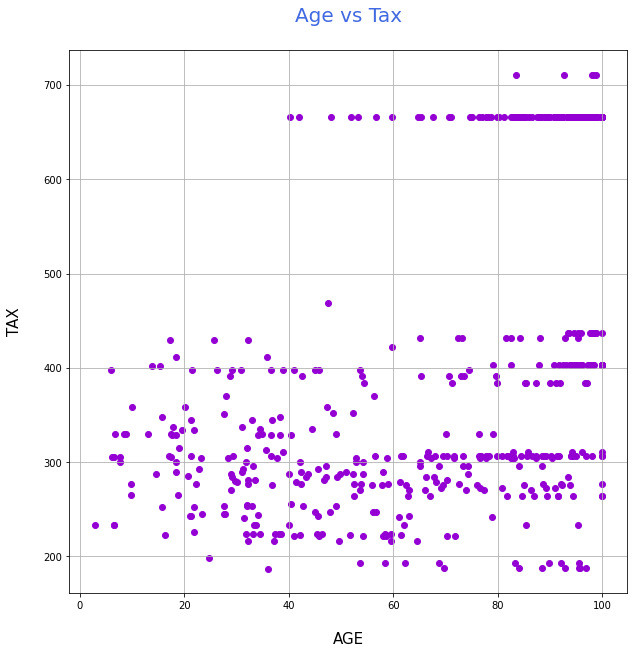

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(x=data['AGE'], y=data['TAX'],color="darkviolet")
plt.xlabel("\nAGE",fontsize=15,color="black")
plt.ylabel("TAX\n ",fontsize=15,color="black")
plt.title("Age vs Tax\n",fontsize=20,color="royalblue")
plt.grid(True)
plt.show()

# Counting RAD Data

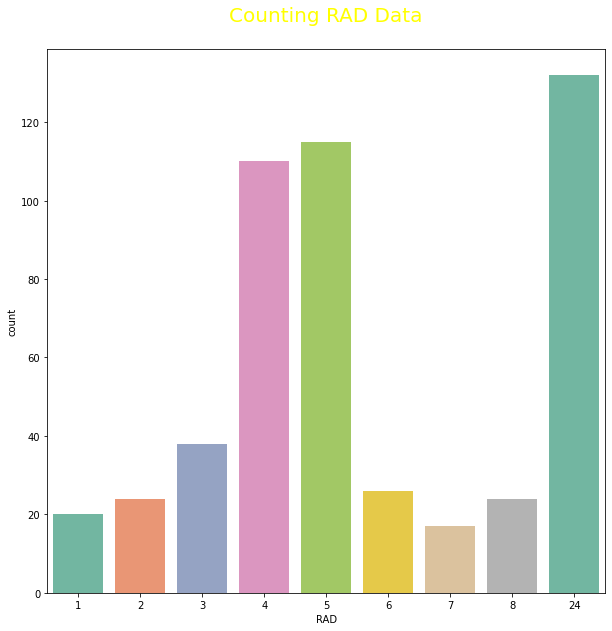

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(x="RAD",data=data,palette = "Set2")
plt.title("Counting RAD Data\n",fontsize=20,color="yellow")
plt.show()

# Data Visualize  With Histogram

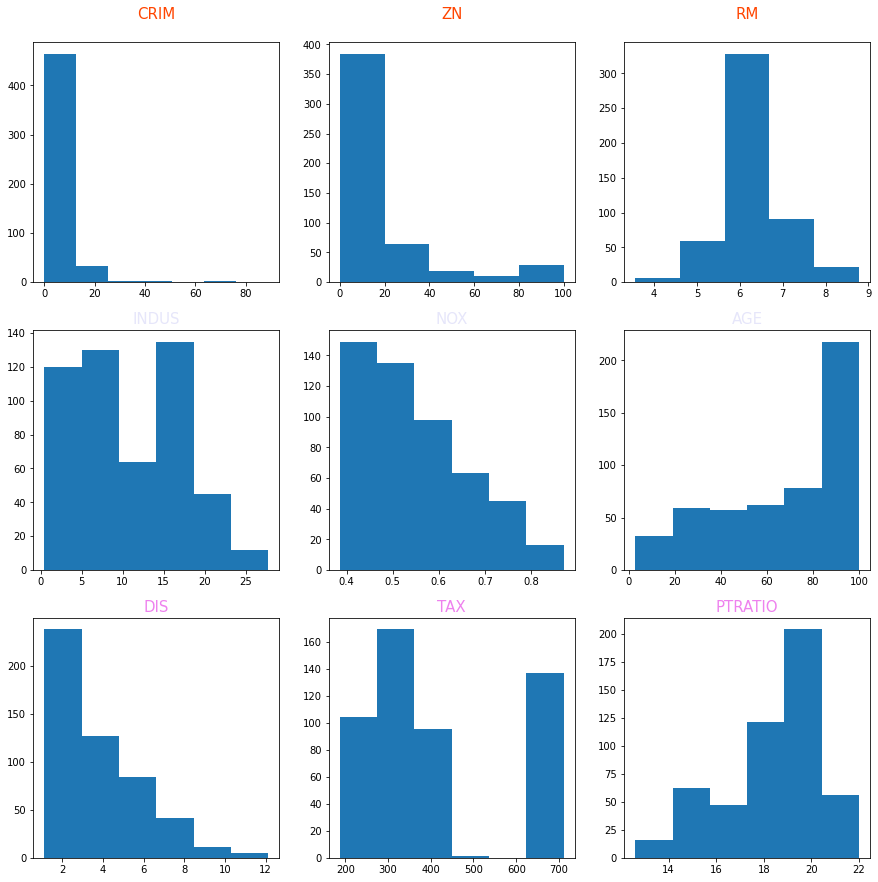

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(15,15))
 
axes[0,0].set_title("CRIM\n",fontsize=15,color="orangered")
axes[0,0].hist(data['CRIM'], bins=7)
 
axes[0,1].set_title("ZN\n",fontsize=15,color="orangered")
axes[0,1].hist(data['ZN'], bins=5);

axes[0,2].set_title("RM\n",fontsize=15,color="orangered")
axes[0,2].hist(data['RM'], bins=5);
 
axes[1,0].set_title("INDUS",color="lavender",fontsize=15)
axes[1,0].hist(data['INDUS'], bins=6);
 
axes[1,1].set_title("NOX",fontsize=15,color="lavender")
axes[1,1].hist(data['NOX'], bins=6);

axes[1,2].set_title("AGE",fontsize=15,color="lavender")
axes[1,2].hist(data['AGE'], bins=6);

axes[2,0].set_title("DIS",fontsize=15,color="violet")
axes[2,0].hist(data['DIS'], bins=6);

axes[2,1].set_title("TAX",fontsize=15,color="violet")
axes[2,1].hist(data['TAX'], bins=6);

axes[2,2].set_title("PTRATIO",fontsize=15,color="violet")
axes[2,2].hist(data['PTRATIO'], bins=6);

#  Data Visualize With Regplot

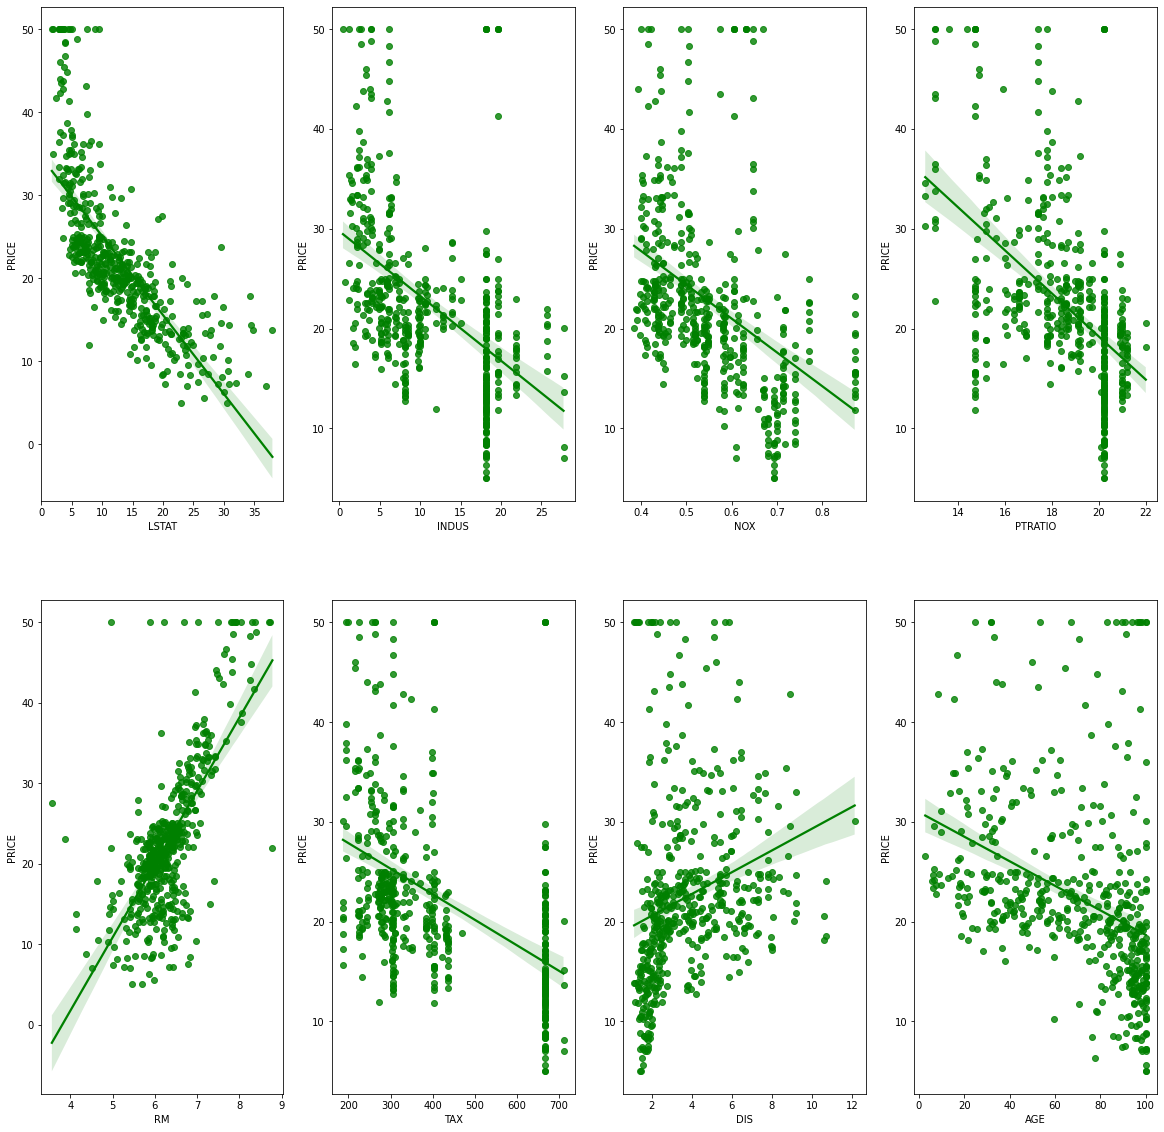

In [18]:
fig,axes=plt.subplots(nrows=2,ncols=4,figsize=(20,20))
columns=["LSTAT","INDUS","NOX","PTRATIO","RM","TAX","DIS","AGE"]
for col,ax in zip(columns,axes.flat):
    sns.regplot(x=data[col],y=data["PRICE"],ax=ax,color="green")

plt.show()


# Visualize Displot PRICE Data

<Figure size 720x720 with 0 Axes>

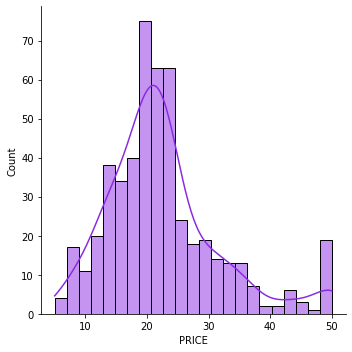

In [19]:
plt.figure(figsize=(10,10))
sns.displot(data=data, x="PRICE",kde=True,color="blueviolet")

plt.show()

# Counting CHAS Data

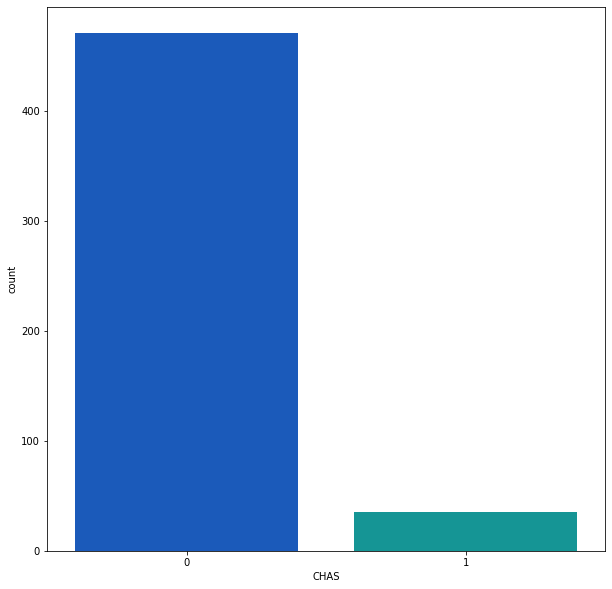

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(x="CHAS",data=data,palette='winter')
plt.show()

# Visualize Data With Pairplot

<Figure size 1080x1080 with 0 Axes>

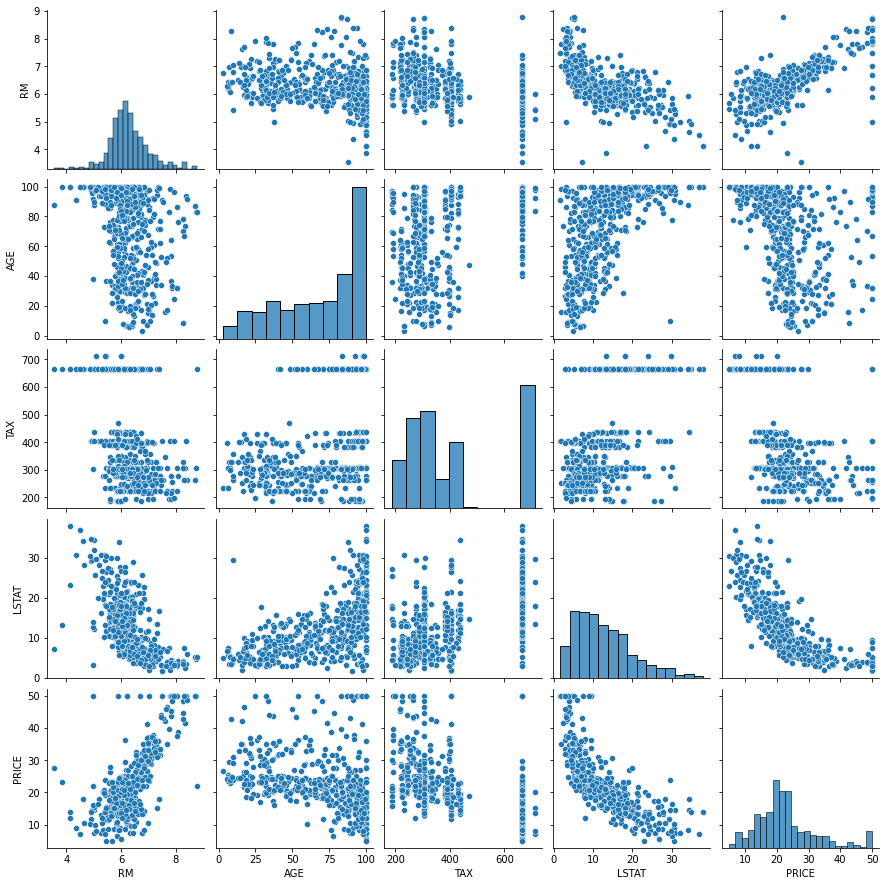

In [21]:
plt.figure(figsize=(15,15))
cols = ['RM', 'AGE', 'TAX', 'LSTAT', 'PRICE'] 
sns.pairplot(data[cols])

plt.show()

# Age Category

In [22]:
    def get_age_category(x):
        if x < 50:
            return 'New'
        elif 50 <= x < 85:
            return 'Old'
        else:
            return 'Very Old'
    data['AGE_Category'] = data.AGE.apply(get_age_category)

In [23]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,AGE_Category
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,Old
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,Old
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,Old
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,New
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,Old


In [24]:
data.groupby('AGE_Category').size()

AGE_Category
New         147
Old         149
Very Old    210
dtype: int64

In [25]:
age_category=pd.DataFrame({"Category":["New","Old","Very Old"],"Numbers":[147,149,210]})
age_category

,Category,Numbers
0,New,147
1,Old,149
2,Very Old,210


# Visualize Age Category Data

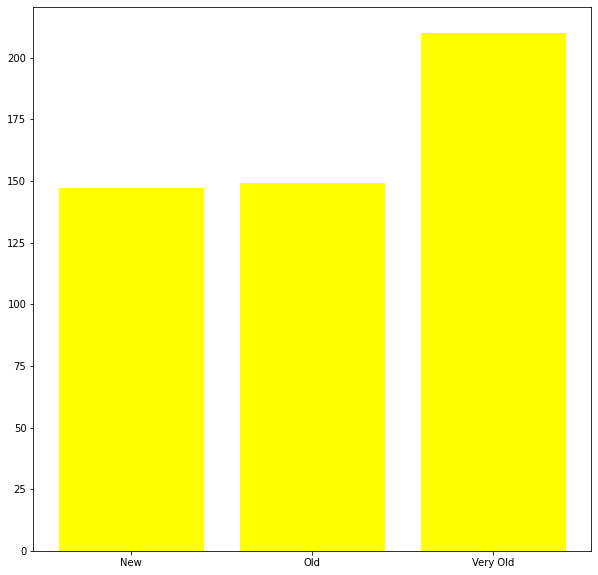

In [26]:
plt.figure(figsize=(10,10))
plt.bar(age_category["Category"],age_category["Numbers"],color="yellow")
plt.show()

# Visualize Data With Violinplot

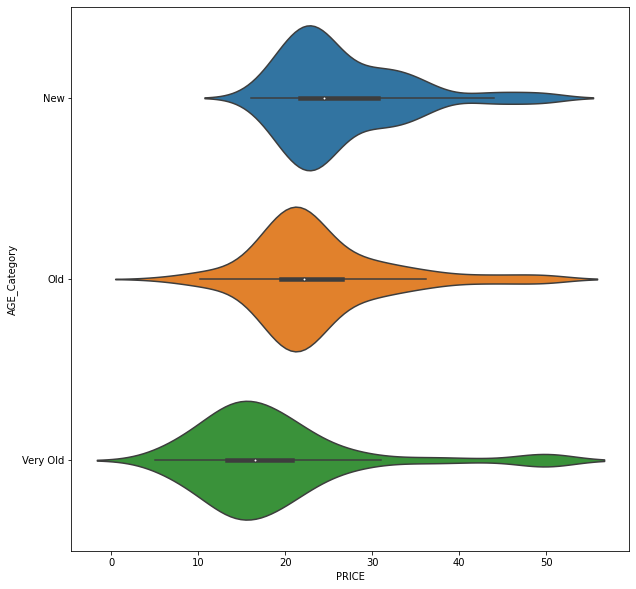

In [27]:
plt.figure(figsize=(10,10))
sns.violinplot(x='PRICE', y='AGE_Category', data=data,order=['New', 'Old', 'Very Old'])

plt.show()

In [28]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,AGE_Category
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,Old
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,Old
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,Old
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,New
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,Old


In [29]:
label_data=data["PRICE"]

In [30]:
final_data=data.drop(["PRICE","AGE_Category"],axis=1)


In [31]:
final_data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


# Scaling Data

In [32]:
scaler = StandardScaler()
scaler.fit(final_data)

StandardScaler()

In [33]:
scale_boston_data = scaler.transform(final_data)

# Data Split Between Train And Test

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(scale_boston_data, label_data, test_size=0.4, random_state=42)

# Create Linear Regression Model

In [35]:
model0 = LinearRegression()

In [36]:
model0.fit(X_train,Y_train)

LinearRegression()

In [37]:
pred=model0.predict(X_test)

# Linear Regression Model Training Accuracy

In [38]:
print("Linear Regression Model Training  Accuracy",model0.score(X_train,Y_train)*100)

Linear Regression Model Training  Accuracy 74.7199884740759


# Linear Regression Model Testing Accuracy

In [39]:
print("Linear Regression Model Testing  Accuracy",model0.score(X_test,Y_test)*100)

Linear Regression Model Testing  Accuracy 71.25140936111225


# Price Vs Predicted Price(Linear Regression Model)

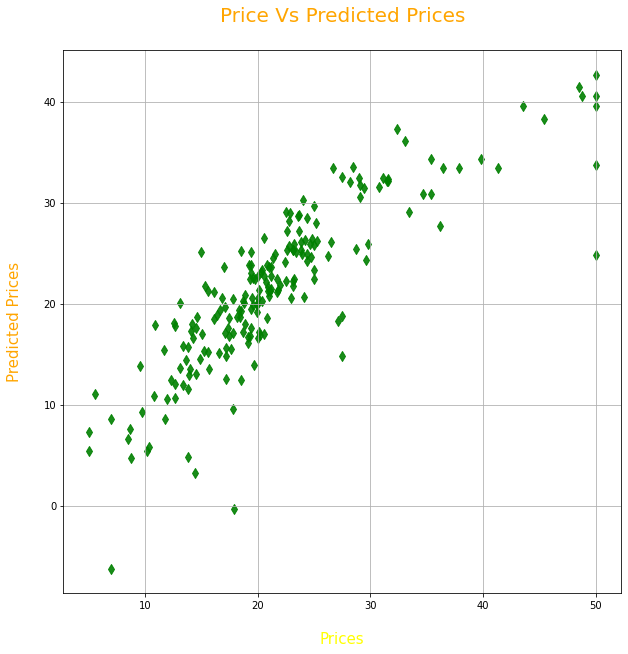

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test,pred,marker="d",alpha=0.9,color="green",s=50)
plt.title("Price Vs Predicted Prices\n",color="orange",fontsize=20)
plt.xlabel("\nPrices",fontsize=15,color="yellow")
plt.ylabel("Predicted Prices\n",fontsize=15,color="orange")
plt.grid(True)
plt.show()

# Predicted Vs Residual Data

In [41]:
residual_data=Y_test-pred

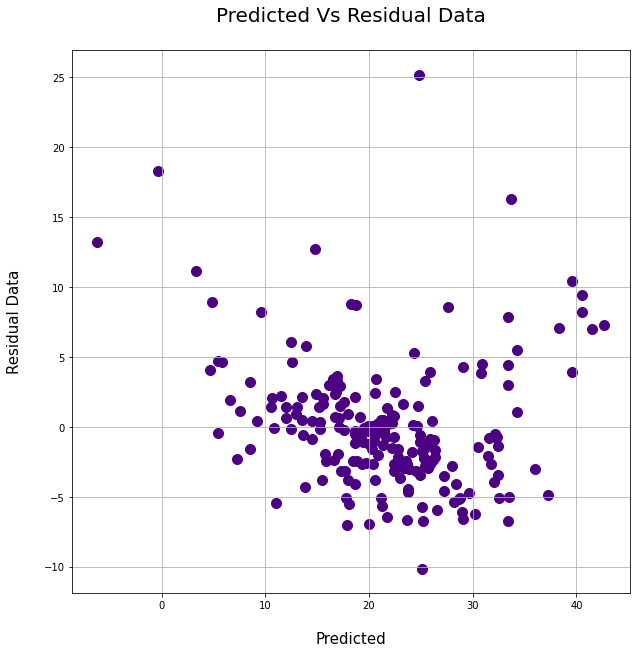

In [42]:
plt.figure(figsize=(10,10))
plt.scatter(pred,residual_data,s=100,color="indigo")
plt.xlabel("\nPredicted",color="black",fontsize=15)
plt.ylabel("Residual Data\n",color="black",fontsize=15)
plt.title("Predicted Vs Residual Data\n",fontsize=20,color="black")
plt.grid(True)
plt.show()

# Normality of Errors

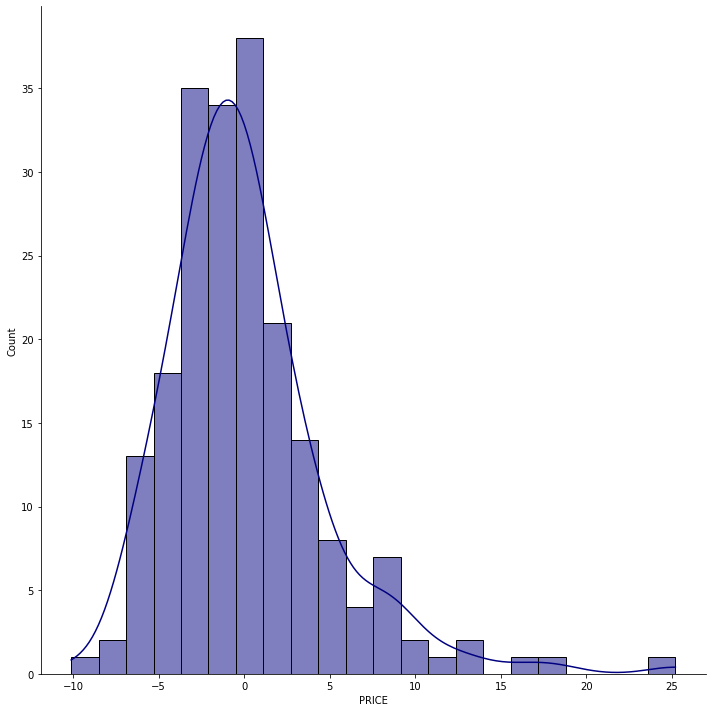

In [43]:
sns.displot(residual_data,kde=True,height=10,color="navy")
plt.show()


#  R2 Score

In [44]:
r2_score(Y_test,pred)

0.7125140936111225

# Mean Squared Error

In [45]:
mean_squared_error(Y_test,pred)

21.83270998957742

# Finding Bias (intercept) of the  Linear Regression

In [46]:
model0.intercept_

22.488475493685723

# Find Weights (coefficients) of the  Linear Regression

In [47]:
model0.coef_

array([-0.97529454,  0.88532314,  0.20552221,  0.89097259, -1.67293396,
        2.67105505, -0.50492412, -3.13375086,  2.20089846, -1.68812853,
       -1.91712943,  0.98922345, -4.10859926])

In [48]:
new_data=np.array([[0.02729,0.0	,7.07,0	,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03]])
new_scale_data=scaler.transform(new_data)

In [49]:
model0.predict(new_scale_data)

array([30.84772682])

# RandomForest  Regressor

In [50]:
final_data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(final_data, label_data, test_size=0.4, random_state=42)

In [52]:
min_max=MinMaxScaler()
X_train=min_max.fit_transform(X_train)
X_train=pd.DataFrame(X_train)

In [53]:
X_test=min_max.fit_transform(X_test)
X_test=pd.DataFrame(X_test)

In [54]:
rfr_model=RandomForestRegressor()

In [55]:
rfr_model.fit(X_train,Y_train)

RandomForestRegressor()

In [56]:
pred_1=rfr_model.predict(X_test)

# Random Forest Model Training Accuracy

In [57]:
print("RandomForest  Regression Model Training  Accuracy",rfr_model.score(X_train,Y_train)*100)


RandomForest  Regression Model Training  Accuracy 97.53161097730899


# RandomForest Model Testing Accuracy

In [58]:
print("RandomForest  Regression Model Testing  Accuracy",rfr_model.score(X_test,Y_test)*100)

RandomForest  Regression Model Testing  Accuracy 86.45289246721187


# price Vs predicted Price RandomForest Regressor

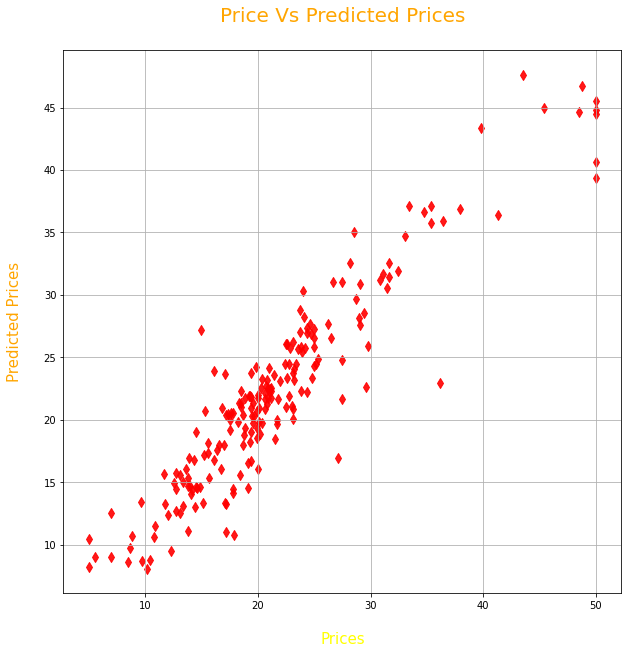

In [59]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test,pred_1,marker="d",alpha=0.9,color="red",s=50)
plt.title("Price Vs Predicted Prices\n",color="orange",fontsize=20)
plt.xlabel("\nPrices",fontsize=15,color="yellow")
plt.ylabel("Predicted Prices\n",fontsize=15,color="orange")
plt.grid(True)
plt.show()

# Predicted Vs Residual Data (RandomForest Regressor)

In [60]:
residual_data_1=Y_test-pred_1

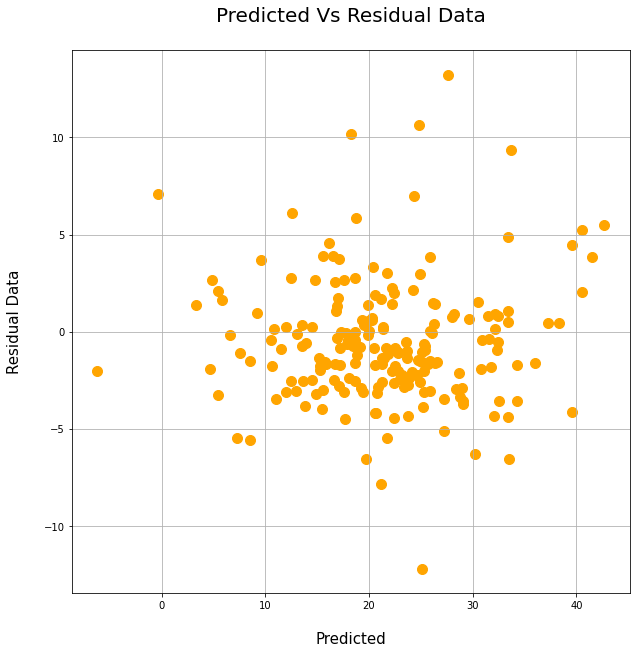

In [61]:
plt.figure(figsize=(10,10))
plt.scatter(pred,residual_data_1,s=100,color="orange")
plt.xlabel("\nPredicted",color="black",fontsize=15)
plt.ylabel("Residual Data\n",color="black",fontsize=15)
plt.title("Predicted Vs Residual Data\n",fontsize=20,color="black")
plt.grid(True)
plt.show()

# Normality of Errors

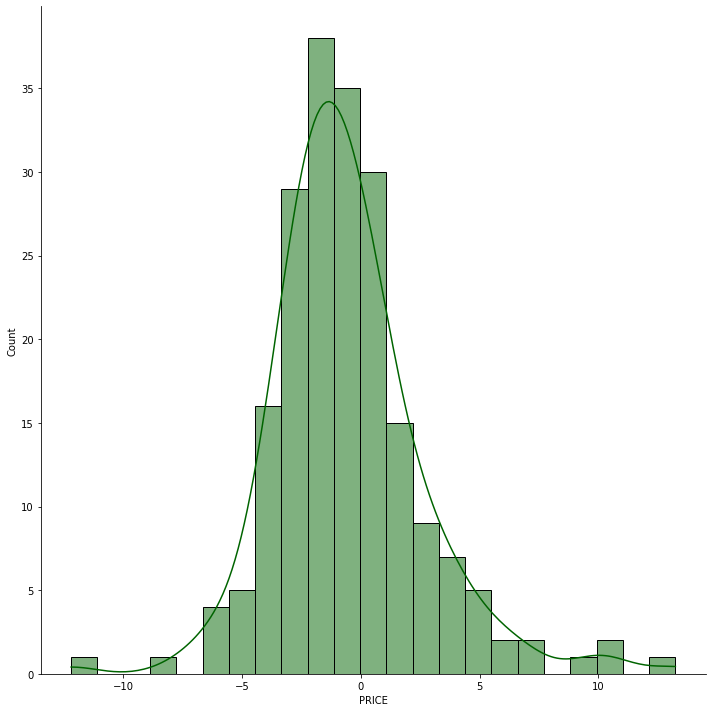

In [62]:
sns.displot(residual_data_1,kde=True,height=10,color="darkgreen")
plt.show()

# R2 Score

In [63]:
r2_score(Y_test,pred_1)

0.8645289246721186

# Mean Squared Error

In [64]:
mean_squared_error(Y_test,pred_1)

10.288158945812802

# Data Prediction

In [65]:
new_data_pred=np.array([[0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33]])

In [66]:
rfr_model.predict(new_data_pred)

array([25.526])